In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from mtrain.smallnet.unet.extract import (
    extract_images_and_masks,
    show_extracted_dataset,
    collapse_to_binary_dataset,
    create_crops_from_extracted,
    collate,
)
from pathlib import Path

In [8]:
TACO_DIR = Path("/Users/hariomnarang/Desktop/personal/TACO/data")
ANN_FILE = TACO_DIR / "annotations.json"
OUT = Path("../../datasets/taco_with_seg_masks")

In [9]:
%%time
extract_images_and_masks(
    ann_file=ANN_FILE, taco_dir=TACO_DIR, output_path=OUT, num_samples=5000, workers=16
)

output directory exists at ../../datasets/taco_with_seg_masks, nuking
CACHE MISS: triggering data generation
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Starting image and mask extraction
Progress track: EXTRACT; CHUNK=3 total_samples=94
Progress track: EXTRACT; CHUNK=2 total_samples=94
Progress track: EXTRACT; CHUNK=1 total_samples=94
Progress track: EXTRACT; CHUNK=0 total_samples=94
Progress track: EXTRACT; CHUNK=4 total_samples=94
Progress track: EXTRACT; CHUNK=5 total_samples=94
EXTRACT; CHUNK=3: 0%
Progress track: EXTRACT; CHUNK=6 total_samples=94
EXTRACT; CHUNK=1: 0%
EXTRACT; CHUNK=6: 0%
Progress track: EXTRACT; CHUNK=7 total_samples=94
Progress track: EXTRACT; CHUNK=10 total_samples=93
Progress track: EXTRACT; CHUNK=9 total_samples=94
Progress track: EXTRACT; CHUNK=8 total_samples=94
EXTRACT; CHUNK=2: 0%
Progress track: EXTRACT; CHUNK=11 total_samples=93
Progress track: EXTRACT; CHUNK=12 total_samples=93
EXTRACT; CHUNK=7: 0%
Progress track:

results: 8


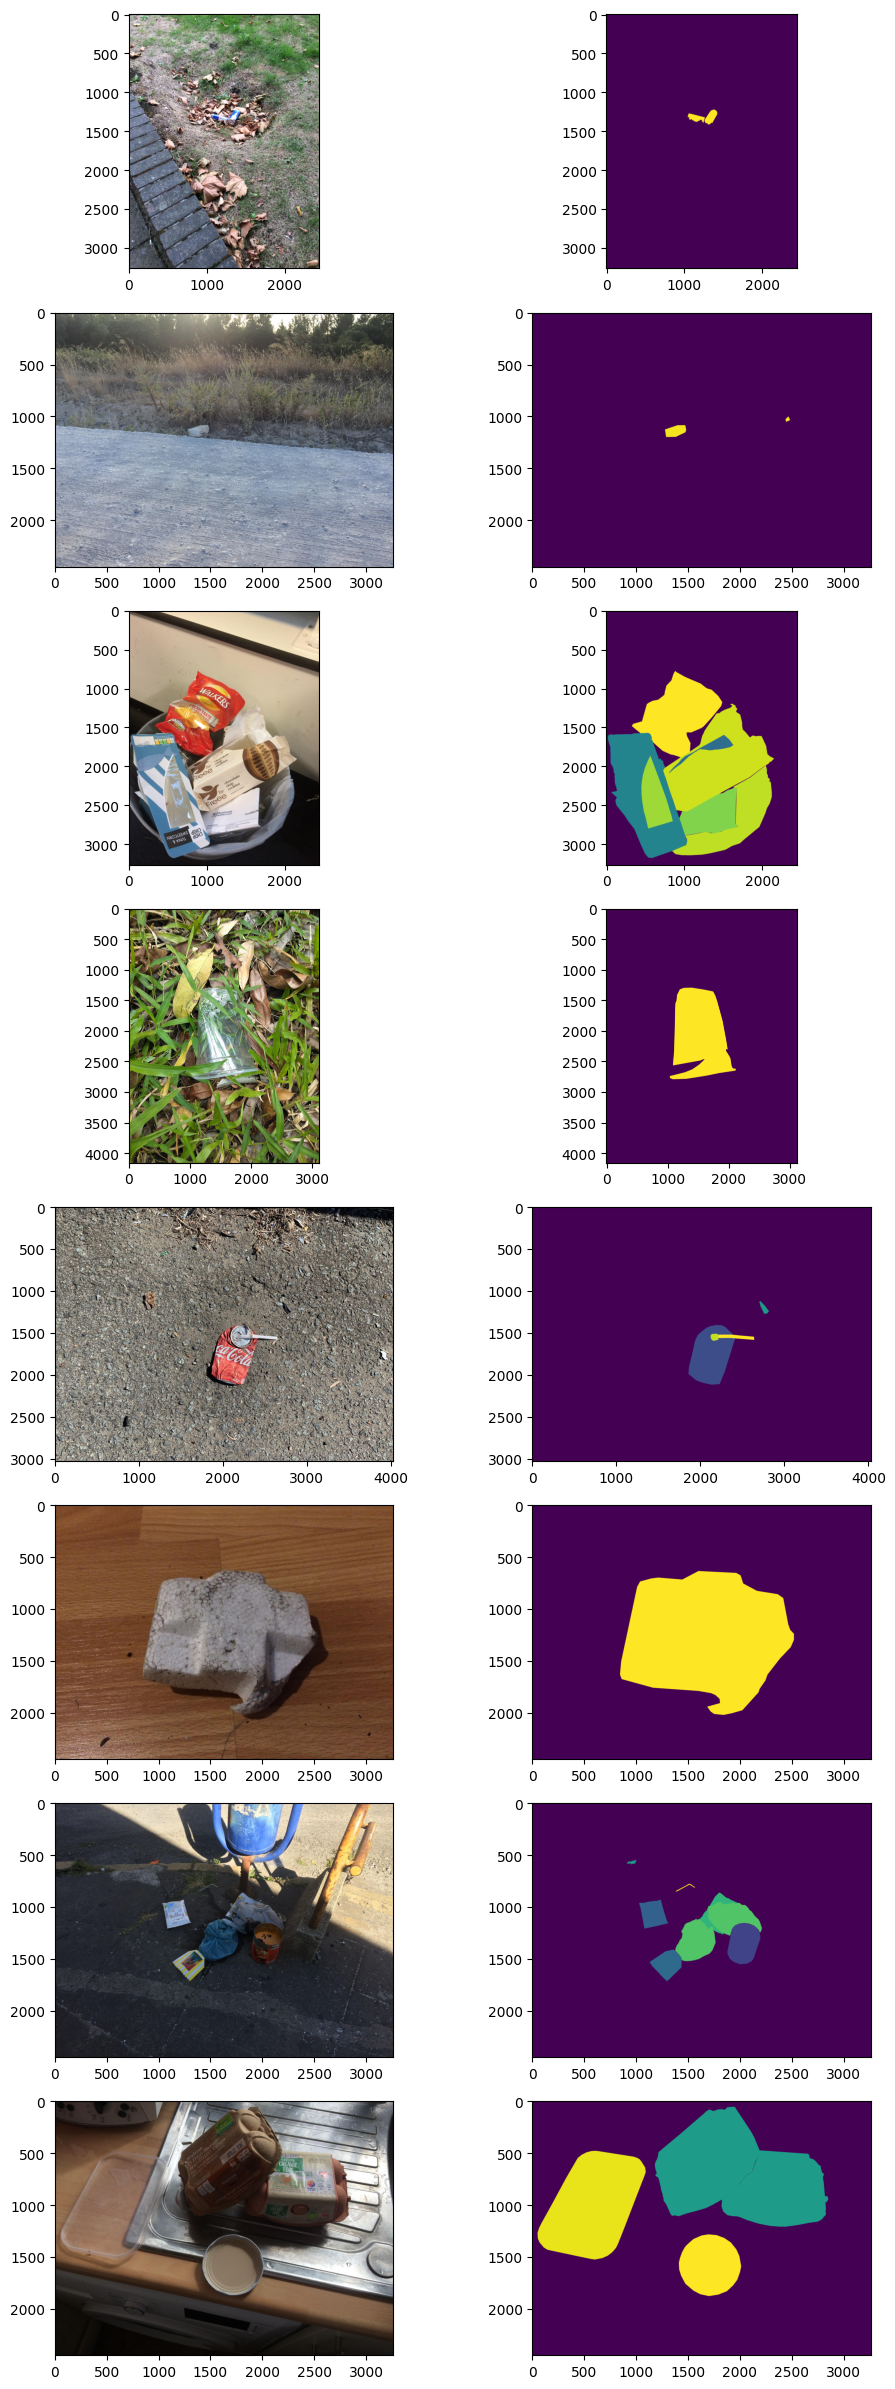

CPU times: user 9.65 s, sys: 1.74 s, total: 11.4 s
Wall time: 11.6 s


In [10]:
%%time
show_extracted_dataset(OUT)

In [11]:
%%time
bin_taco_path = Path( "../../datasets/BINARY_TACO")
collapse_to_binary_dataset(OUT, bin_taco_path, workers=16)

starting binary collapse of dataset, input=../../datasets/taco_with_seg_masks output=../../datasets/BINARY_TACO
output directory ../../datasets/BINARY_TACO exists, nuking
Original codes: ['background', 'Aluminium foil', 'Battery', 'Aluminium blister pack', 'Carded blister pack', 'Other plastic bottle', 'Clear plastic bottle', 'Glass bottle', 'Plastic bottle cap', 'Metal bottle cap', 'Broken glass', 'Food Can', 'Aerosol', 'Drink can', 'Toilet tube', 'Other carton', 'Egg carton', 'Drink carton', 'Corrugated carton', 'Meal carton', 'Pizza box', 'Paper cup', 'Disposable plastic cup', 'Foam cup', 'Glass cup', 'Other plastic cup', 'Food waste', 'Glass jar', 'Plastic lid', 'Metal lid', 'Other plastic', 'Magazine paper', 'Tissues', 'Wrapping paper', 'Normal paper', 'Paper bag', 'Plastic film', 'Six pack rings', 'Garbage bag', 'Other plastic wrapper', 'Single-use carrier bag', 'Polypropylene bag', 'Crisp packet', 'Spread tub', 'Tupperware', 'Disposable food container', 'Foam food container', 'O

In [ ]:
%%time
show_extracted_dataset(bin_taco_path)

results: 8


In [ ]:
%%time
crop_path = Path("../../datasets/CROPS")
create_crops_from_extracted(ANN_FILE, bin_taco_path, crop_path, 50, 5000, workers=16)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
CROPS: output directory ../../datasets/CROPS exists, nuking
Creating 2000 crops from 1499 images
Progress track: MPCrop 2: total_samples=250
Progress track: MPCrop 1: total_samples=250
Progress track: MPCrop 3: total_samples=250
Progress track: MPCrop 0: total_samples=250
Progress track: MPCrop 4: total_samples=250
Progress track: MPCrop 6: total_samples=250
Progress track: MPCrop 5: total_samples=250
Progress track: MPCrop 7: total_samples=250
MPCrop 2:: 0%
MPCrop 1:: 0%
MPCrop 4:: 0%
MPCrop 6:: 0%
MPCrop 7:: 0%
MPCrop 0:: 0%
MPCrop 5:: 0%
MPCrop 3:: 0%
MPCrop 3:: 10%
MPCrop 2:: 10%
MPCrop 4:: 10%
MPCrop 1:: 10%
MPCrop 6:: 10%
MPCrop 7:: 10%
MPCrop 0:: 10%
MPCrop 5:: 10%
MPCrop 3:: 20%
MPCrop 1:: 20%
MPCrop 7:: 20%
MPCrop 2:: 20%
MPCrop 4:: 20%
MPCrop 6:: 20%
MPCrop 0:: 20%
failure in generating crop for ../../datasets/BINARY_TACO/images/326.jpeg, reason=OpenCV(4.13.0) /Users/xperience/GHA-Actions-OpenC